 PROJET 6 : ANALYSEZ LES VENTES D'UNE LIBRAIRIE

> ANTOINE - Analyse des différents indicateurs de vente

- Différents indicateurs et graphiques autour du CA
- Evolution dans le temps
- Mise en place d'une décomposition en moyenne mobile pour évaluer la tendance globale

- Tops et flops des références 
- Répartition par catégorie 

- Informations sur les profils des clients 
- Répartition du CA entre eux (via courbe de Lorenz)

> JULIE - Analyse plus ciblée sur les clients : Comprendre le comportement des clients en ligne 

- Le lien entre le genre d’un client et les catégories des livres achetés (quali - quali / Khi2)
- Le lien entre l’âge des clients et le montant total des achats ( quanti - quanti - Pearson ou Spearman)
- Le lien entre l'âge et la fréquence d’achat (quanti - quanti / Pearson ou Spearman)
- Le lien entre l'âge et la taille du panier moyen (quanti - quanti / Pearson ou Spearman) 
- Le lien entre l'âge et les catégories des livres achetés (quanti - quali / Anova ou Kruskal Wallis )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import norm
import datetime
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('df.csv')

# DEMANDE ANTOINE N°1

> Différents indicateurs et graphiques autour du CA et évolution dans le temps

## CA GLOBAL DE 2021 à 2023

In [3]:
#ca par année
ca_year = df.groupby(['annee'])[['price']].sum().reset_index()

# Evolution par annnée
evo_2021_2022 = round(ca_year.price.pct_change()*100,2)
evo_2021_2022

0      NaN
1    28.04
2   -84.05
Name: price, dtype: float64

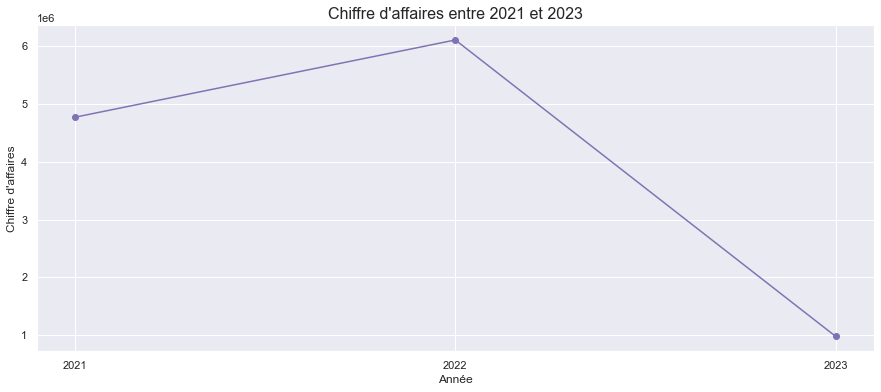

In [4]:
plt.figure(figsize=(15,6))

x = ca_year.annee
y = ca_year.price

plt.plot(x,y, c = 'm', marker ='o')
plt.title ('Chiffre d\'affaires entre 2021 et 2023', fontsize = 16)
ticks = ['2021', '2022', '2023']
plt.xticks(x, ticks)
plt.xlabel('Année', fontsize = 12)
plt.ylabel('Chiffre d\'affaires', fontsize = 12)
plt.show;

> CA total en 2021 est de ***4.771.724€.***

> CA total en 2022 est de ***6.109.920€.***

> CA total en 2023 est de ***974.364€.***

> Nous pouvons constater une hausse constante du CA entre 2021 et 2022 de ***28.04%***.

> Une baisse de ***84.05%*** du CA entre 2022 et 2023. 

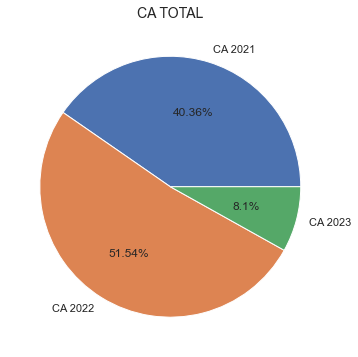

In [71]:
plt.figure(figsize=(10,6))
ca_total = [year_2021.price.sum(), year_2022.price.sum(), year_2023.price.sum()]
plt.pie(ca_total, labels = ['CA 2021', 'CA 2022', 'CA 2023'], autopct = lambda ca_total: str(round(ca_total,2)) + '%' )
plt.title('CA TOTAL', fontsize = 14)
plt.show()

## CA global par mois de 2021 à 2023

In [5]:
#ca par mois sur les trois ans de données
ca_month = df.groupby(['annee_mois'])[['price']].sum().reset_index()

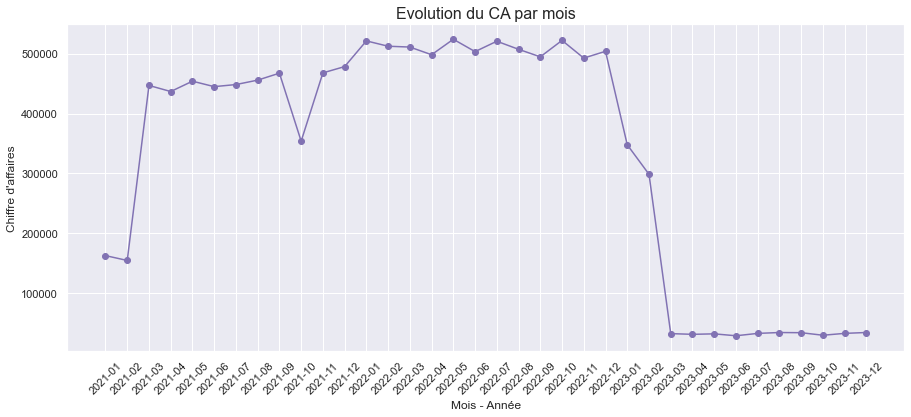

In [6]:
plt.figure(figsize=(15,6))

x =ca_month.annee_mois
y = ca_month.price

plt.plot(x,y, c = 'm',  marker ='o')
plt.title ('Evolution du CA par mois', fontsize = 16)

ticks = ca_month.annee_mois
plt.xticks(x, ticks)
plt.xticks(rotation=45)

plt.xlabel('Mois - Année', fontsize = 12)
plt.ylabel('Chiffre d\'affaires', fontsize = 12)
plt.show;

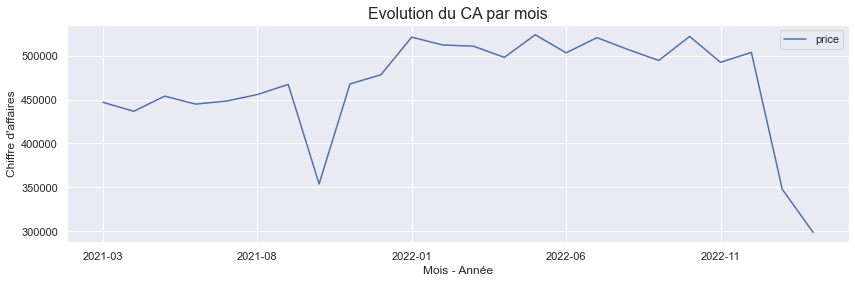

In [7]:
# On commence à partir de 03-2021 (début d'une stabilité dans les ventes) et on arrête en 02-2023 (début d'une chute nette des ventes)


ca_month[ca_month['annee_mois'].between('2021-03','2023-02')].plot(x = 'annee_mois', y = 'price', figsize =(14,4));
plt.title ('Evolution du CA par mois', fontsize = 16)

ticks = ca_month[ca_month['annee_mois'].between('2021-03','2023-02')]


plt.xlabel('Mois - Année', fontsize = 12)
plt.ylabel('Chiffre d\'affaires', fontsize = 12)
plt.show;

> Les ventes sont ***stables*** du mois de mars 2021 au mois de septembre 2021.

> Nous notons une ***forte baisse du CA en octobre 2021*** puis de nouveau une hausse des ventes à partir de novembre 2021. 

> Les ventes progressent entre novembre 2021 et janvier 2022 puis elles sont à peu près stables jusqu'à la chute qui commence en décembre 2022.

## Comparaison du CA global des années 2021- 2022 -2023

In [8]:
## Création de DF pour chaque année
mask_2021 = (df['date']>'2021-01-01')&(df['date']<='2021-12-31')
year_2021 = df.loc[mask_2021]


mask_2022 = (df['date']>'2022-01-01')&(df['date']<='2022-12-31')
year_2022 = df.loc[mask_2022]

mask_2023 = (df['date']>'2023-01-01')&(df['date']<='2023-12-31')
year_2023 = df.loc[mask_2023]

#ca par mois de l'année 2023 - 2022- 2021 
ca_mois_2023 = year_2023.groupby(['mois'])[['price']].sum().reset_index()
ca_mois_2022 = year_2022.groupby(['mois'])[['price']].sum().reset_index()
ca_mois_2021 = year_2021.groupby(['mois'])[['price']].sum().reset_index()

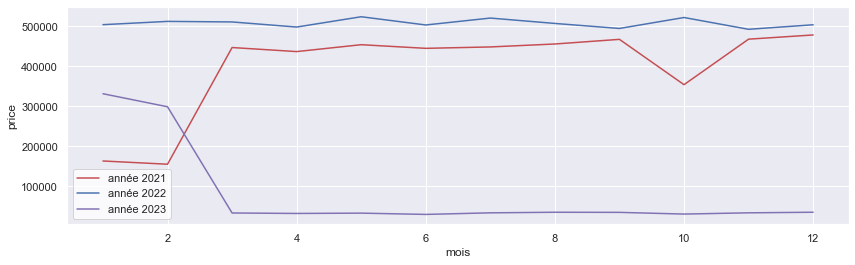

In [9]:
fig, ax = plt.subplots(figsize=(14,4))
sns.lineplot(x=ca_mois_2021.mois, 
            y=ca_mois_2021.price,
             color='r',
             ax=ax)
sns.lineplot(x=ca_mois_2022.mois, 
             y=ca_mois_2022.price, 
             color='b',
             ax=ax)    
sns.lineplot(x=ca_mois_2023.mois, 
            y=ca_mois_2023.price, 
             color='m',
             ax=ax)    
ax.legend(['année 2021', 'année 2022', 'année 2023'], facecolor='w')
plt.show()

> L'année de lancement 2021 est globalement **stable**, nous pouvons néanmoins remarquer une ***forte baisse du CA en octobre***, nous y reviendrons plus tard. 

> L'année 2022 présente une **hausse du CA** par rapport à l'année 2021 et celui-ci reste régulier.

> L'année 2023 présente une **chute conséquente du CA** sans doute liée à un **arrêt des activités**. 

## CA total par catégorie entre 2021 et 2023

In [10]:
ca_total_categ = df.groupby(['categ'])[['price']].sum().reset_index()

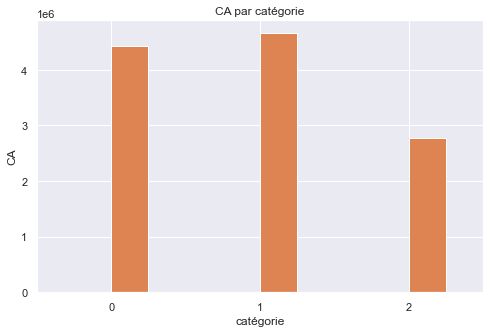

In [11]:
ca_total_categ.plot.bar(
    figsize = (8,5), 
    rot=0, 
    title = 'CA par catégorie', 
    xlabel = 'catégorie', 
    ylabel = 'CA',
    legend = False);

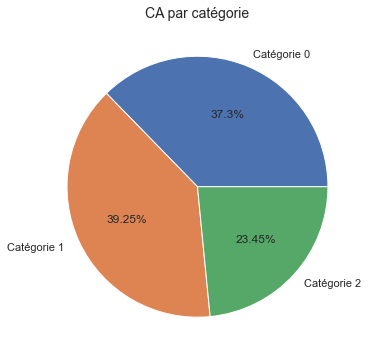

In [12]:
plt.figure(figsize=(10,6))
ca_tot_categ = [ca_total_categ.iloc[0,1], ca_total_categ.iloc[1,1], ca_total_categ.iloc[2,1]]

plt.pie(ca_tot_categ, labels = ['Catégorie 0 ', 'Catégorie 1 ', 'Catégorie 2'], autopct = lambda ca_tot_categ: str(round(ca_tot_categ,2)) + '%' )
plt.title('CA par catégorie', fontsize = 14)
plt.show()

> La librairie LAPAGE réalise le plus de CA avec la vente des produits de catégorie 1. 

## CA par catégorie pour les années 2021- 2022 -2023

In [13]:
#df CA par année et par catégorie
ca_categ = df.groupby(['annee', 'categ'])[['price']].sum().reset_index()

# df CA pour chaque catégorie
df_categ_0 = df[df['categ'] == 0]
ca_categ_0 = df_categ_0.groupby(['annee'])[['price']].sum().reset_index()
df_categ_1 = df[df['categ'] == 1]
ca_categ_1 = df_categ_1.groupby(['annee'])[['price']].sum().reset_index()
df_categ_2 = df[df['categ'] == 2]
ca_categ_2 = df_categ_2.groupby(['annee'])[['price']].sum().reset_index()

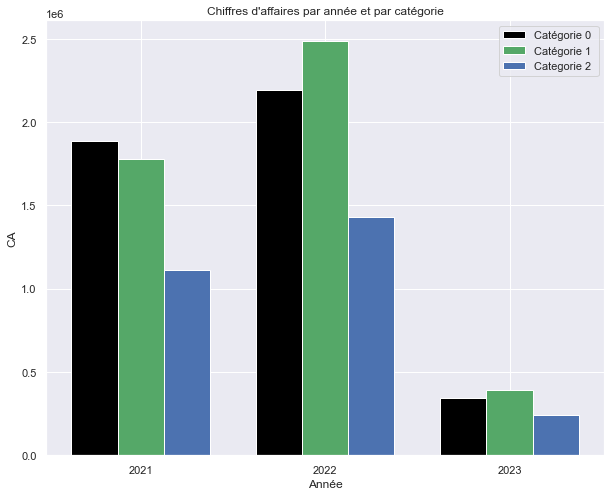

In [14]:
plt.figure(figsize=[10, 8])

# Data to be plotted

categ0 = ca_categ_0.price
categ1 = ca_categ_1.price
categ2 = ca_categ_2.price

# Using numpy to group 3 different data with bars
X = np.arange(len(ca_categ_0))

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side

plt.bar(X, categ0, color = 'black', width = 0.25)
plt.bar(X + 0.25, categ1, color = 'g', width = 0.25)
plt.bar(X + 0.5, categ2, color = 'b', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Catégorie 0 ', 'Catégorie 1 ', 'Categorie 2'])

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(3)], ['2021', '2022', '2023'])

# Giving the tilte for the plot
plt.title("Chiffres d'affaires par année et par catégorie")

# Namimg the x and y axis
plt.xlabel('Année')
plt.ylabel('CA')
# Saving the plot as a 'png'
#plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

> En 2021, c'est la vente des produits de ***catégorie 0*** qui génére le plus de CA.

> En 2022 et 2023, c'est la vente des produits de la ***catégorie 1*** qui génére le plus de CA.


## CA total par client

In [15]:
# CA total par client + nb de sessions
df_ca_client = df.groupby('client_id').agg({'session_id' : 'count', 'price' : 'sum'}).reset_index()
df_ca_client.rename(columns = {'session_id' : 'nb_de_session', 'price' : 'ca_par_client'}, inplace = True)
df_ca_client.sort_values('ca_par_client', ascending = False).head(10)

,client_id,nb_de_session,ca_par_client
677,c_1609,25488,324033.35
4388,c_4958,5195,289760.34
6337,c_6714,9187,153660.84
2724,c_3454,6773,113668.89
2513,c_3263,403,5276.87
634,c_1570,369,5271.62
2108,c_2899,105,5214.05
1268,c_2140,402,5208.82
7006,c_7319,371,5155.77
7791,c_8026,377,5092.90


> Nous pouvons remarquer que les 4 premiers résultats sont beaucoup plus élévés que les autres. 
Nous avons 4 clients qui sortent du lot. 

# DEMANDE ANTOINE N°2
> Mise en place d'une décomposition en moyenne mobile pour évaluer la tendance globale

## CA par jour

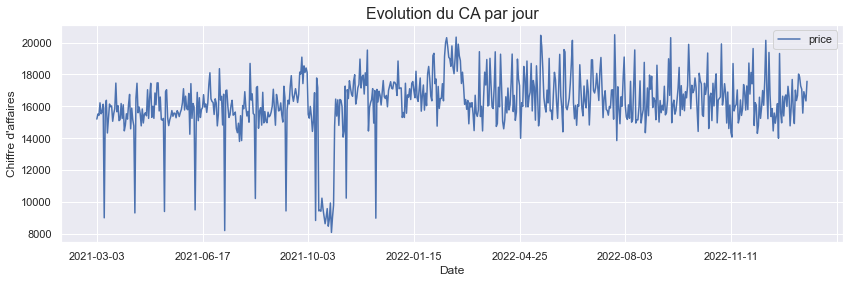

In [16]:
# DF CA par jour 
ca_jour = df.groupby(['date'])[['price']].sum().reset_index()

ca_jour[ca_jour['date'].between('2021-03-01','2023-02-01')].plot(x = 'date', y = 'price', figsize =(14,4));
plt.title ('Evolution du CA par jour', fontsize = 16)

ticks = ca_jour[ca_jour['date'].between('2021-03-01','2023-02-01')]


plt.xlabel('Date', fontsize = 12)
plt.ylabel('Chiffre d\'affaires', fontsize = 12)
plt.show;

> Nous pouvons remarquer qu’il est très difficile d’acquérir des connaissances à partir du graphique ci dessus car les données fluctuent beaucoup.

> Tracons la moyenne mobile afin d'avoir davantage de lisibilité.

## Calcul et représentation de la moyenne mobile

> Taille de la fenêtre : 7 soit une moyenne mobile de 7 jours. 

C:\Users\BDSCRE~1\AppData\Local\Temp/ipykernel_119280/570037637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moyenne_mob['moy_mobile_7jours' ] = moyenne_mob.price.rolling(7).mean()


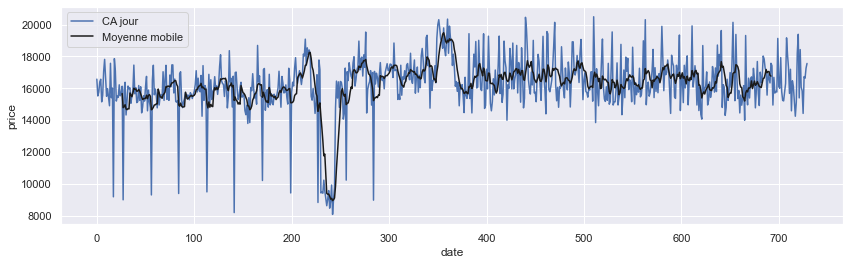

In [17]:
moyenne_mob = ca_jour[ca_jour['date'].between('2021-03-01','2023-02-01')]

moyenne_mob['moy_mobile_7jours' ] = moyenne_mob.price.rolling(7).mean() 

fig, ax = plt.subplots(figsize=(14,4))

plt.plot(ca_jour['price'] ,label='CA jour')
plt.plot(moyenne_mob['moy_mobile_7jours'], label='Moyenne mobile', color ='k')
plt.legend()
ticks = ca_jour['date']
plt.ylabel('price')
plt.xlabel('date')
plt.show();

> Nous pouvons remarquer que la moyenne des ventes est régulière sauf au mois d'octobre où nous relevons une forte baisse du CA. 

# DEMANDE ANTOINE N°3

> Tops et flops des références 


In [98]:
df_produit = df.groupby(['id_prod', 'categ', ]).agg({'session_id' : 'count', 'price' : 'sum'}).reset_index()

## Les 3 références les plus vendues

In [19]:
df_produit.nlargest(3,'session_id') 

,id_prod,categ,session_id,price
2592,1_369,1.0,2252,54025.48
2645,1_417,1.0,2189,45947.11
2642,1_414,1.0,2180,51949.40


> Les 3 références les plus vendues appartiennent à la ***catégorie 1***. Les références sont : ***1_369 / 1_417 / 1_414.***

## Les 3 références les moins vendues

In [20]:
df_produit.nsmallest(3,'session_id')

,id_prod,categ,session_id,price
166,0_1151,0.0,1,2.99
313,0_1284,0.0,1,1.38
417,0_1379,0.0,1,2.99


> Les 3 références les moins vendues appartiennent à la ***catégorie 0***. Les références sont : ***0_1151 / 0_1284 / 0_1379.***

## Les 3  références ayant généré le plus de CA 

In [21]:
df_produit.nlargest(3,'price') 

,id_prod,categ,session_id,price
3097,2_159,2.0,650,94893.50
3071,2_135,2.0,1005,69334.95
3046,2_112,2.0,968,65407.76


> Les 3 références ayant généré le plus de CA appartiennent à la ***catégorie 2***. Les références sont : ***2_159 / 2_135 / 2_112.***

## Les 3  références ayant généré le moins de CA 

In [22]:
df_produit.nsmallest(3,'price') 

,id_prod,categ,session_id,price
595,0_1539,0.0,1,0.99
313,0_1284,0.0,1,1.38
719,0_1653,0.0,2,1.98


> Les 3 références ayant généré le moins de CA appartiennent à la ***catégorie 0***. Les références sont : ***0_1539 / 0_1284 / 0_1653.***

## Top et flop des références par catégorie

### Les 3  réferences  les plus vendues par catégorie


In [23]:
df_produit.groupby([ 'categ']).apply(lambda x: x.nlargest(3, columns=['session_id']))

id_prod  categ  session_id     price
categ                                          
0.0   466   0_1422    0.0        1292  14741.72
      476   0_1431    0.0        1282  14089.18
      469   0_1425    0.0        1266  16445.34
1.0   2592   1_369    1.0        2252  54025.48
      2645   1_417    1.0        2189  45947.11
      2642   1_414    1.0        2180  51949.40
2.0   3035   2_102    2.0        1027  60736.78
      3071   2_135    2.0        1005  69334.95
      3046   2_112    2.0         968  65407.76

### Les 3  références  les moins vendues par catégorie

In [24]:
df_produit.groupby([ 'categ']).apply(lambda x: x.nsmallest(3, columns=['session_id']))

id_prod  categ  session_id   price
categ                                        
0.0   166   0_1151    0.0           1    2.99
      313   0_1284    0.0           1    1.38
      417   0_1379    0.0           1    2.99
1.0   2629   1_402    1.0           2   69.04
      2649   1_420    1.0           2   14.24
      2753   1_514    1.0           2  135.32
2.0   3176    2_23    2.0           1  115.99
      3248    2_81    2.0           1   86.99
      3264    2_98    2.0           1  149.74

### Les 3  des réferences  ayant généré le plus de CA par catégorie

In [25]:
df_produit.groupby([ 'categ']).apply(lambda x: x.nlargest(3, columns=['price']))

id_prod  categ  session_id     price
categ                                          
0.0   487   0_1441    0.0        1235  23452.65
      465   0_1421    0.0        1151  23008.49
      457   0_1414    0.0        1150  22287.00
1.0   2620   1_395    1.0        1875  54356.25
      2592   1_369    1.0        2252  54025.48
      2642   1_414    1.0        2180  51949.40
2.0   3097   2_159    2.0         650  94893.50
      3071   2_135    2.0        1005  69334.95
      3046   2_112    2.0         968  65407.76

### Les 3 réferences ayant généré le moins de CA  par catégorie

In [26]:
df_produit.groupby([ 'categ']).apply(lambda x: x.nsmallest(3, columns=['price']))

id_prod  categ  session_id   price
categ                                        
0.0   595   0_1539    0.0           1    0.99
      313   0_1284    0.0           1    1.38
      719   0_1653    0.0           2    1.98
1.0   2649   1_420    1.0           2   14.24
      2432   1_224    1.0           4   19.80
      2704   1_470    1.0           4   21.64
2.0   3248    2_81    2.0           1   86.99
      3176    2_23    2.0           1  115.99
      3264    2_98    2.0           1  149.74

## Top et flop des références par tranche d'âge

In [27]:
df_produit_2 = df.groupby(['id_prod','categ', 'tranche_age' ]).agg({'session_id' : 'count', 'price' : 'sum'}).reset_index()

### Les 3  réferences les plus vendues par tranche d'âge/par âge

In [28]:
df_produit_2.groupby([ 'tranche_age']).apply(lambda x: x.nlargest(3, columns=['session_id']))

id_prod  categ tranche_age  session_id     price
tranche_age                                                       
18 à 25     16688   2_102    2.0     18 à 25         614  36311.96
            17387    2_39    2.0     18 à 25         587  34040.13
            16824   2_135    2.0     18 à 25         585  40359.15
26 à 35     13753   1_369    1.0     26 à 35         340   8156.60
            16689   2_102    2.0     26 à 35         337  19930.18
            16825   2_135    2.0     26 à 35         334  23042.66
36 à 45     14065   1_417    1.0     36 à 45         604  12677.96
            2955   0_1441    0.0     36 à 45         597  11337.03
            2982   0_1445    0.0     36 à 45         586   5854.14
46 à 55     14050   1_414    1.0     46 à 55         529  12606.07
            13755   1_369    1.0     46 à 55         515  12354.85
            14042   1_413    1.0     46 à 55         505   9084.95
56 à 65     13756   1_369    1.0     56 à 65         371   8900.29
            14051   1_414    1.0     56 à 65         333   7935.39
            13953   1_398    1.0     56 à 65         325   3305.25
66 à 75     14104   1_425    1.0     66 à 75         252   4281.48
            13757   1_369    1.0     66 à 75         227   5445.73
            13889   1_388    1.0     66 à 75         220   3674.00
76 à 85     14053   1_414    1.0     76 à 85         112   2668.96
            13758   1_369    1.0     76 à 85          94   2255.06
            14069   1_417    1.0     76 à 85          90   1889.10
85+         14482   1_480    1.0         85+          29    553.32
            13940   1_396    1.0         85+          24    446.40
            13823   1_378    1.0         85+          23    612.03

In [29]:
df_produit_3 = df.groupby(['id_prod','categ', 'age' ]).agg({'session_id' : 'count', 'price' : 'sum'}).reset_index()
df_produit_3.groupby([ 'age']).apply(lambda x: x.nlargest(3, columns=['session_id']))

id_prod  categ  age  session_id     price
age                                                
18  79999    2_37    2.0   18         170   8328.30
    77681   2_112    2.0   18         167  11284.19
    79367   2_208    2.0   18         163   8943.81
19  77682   2_112    2.0   19          63   4256.91
    80116    2_43    2.0   19          58   4059.42
...           ...    ...  ...         ...       ...
92  63057   1_406    1.0   92           6    148.86
    63952   1_433    1.0   92           6    113.94
93  17624  0_1449    0.0   93           8     39.92
    76262   1_735    1.0   93           6    137.94
    23278  0_1574    0.0   93           5     48.35

[228 rows x 5 columns]

### Les 3  réferences les  moins vendues par tranche d'âge

In [30]:
df_produit_2.groupby([ 'tranche_age']).apply(lambda x: x.nsmallest(3, columns=['session_id']))

id_prod  categ tranche_age  session_id  price
tranche_age                                                   
18 à 25     644   0_1098    0.0     18 à 25           1  31.25
            913    0_114    0.0     18 à 25           1  19.15
            1001  0_1154    0.0     18 à 25           1  12.82
26 à 35     58    0_1005    0.0     26 à 35           1  20.99
            90    0_1010    0.0     26 à 35           1   1.96
            197    0_103    0.0     26 à 35           1  10.99
36 à 45     102   0_1012    0.0     36 à 45           1  32.40
            378   0_1056    0.0     36 à 45           1   2.46
            572   0_1087    0.0     36 à 45           1  29.99
46 à 55     216   0_1032    0.0     46 à 55           1  21.60
            509   0_1076    0.0     46 à 55           1  25.11
            611   0_1093    0.0     46 à 55           1   2.99
56 à 65     164   0_1024    0.0     56 à 65           1  30.11
            337    0_105    0.0     56 à 65           1   7.99
            535   0_1080    0.0     56 à 65           1   2.43
66 à 75     61    0_1006    0.0     66 à 75           1  26.64
            608   0_1092    0.0     66 à 75           1  22.02
            1116  0_1171    0.0     66 à 75           1   0.99
76 à 85     411   0_1060    0.0     76 à 85           1  12.53
            1117  0_1171    0.0     76 à 85           1   0.99
            1161  0_1177    0.0     76 à 85           1   4.99
85+         162   0_1023    0.0         85+           1   4.99
            179   0_1027    0.0         85+           1   4.99
            207   0_1030    0.0         85+           1  13.73

### Les3  réferences ayant généré le plus de CA par tranche d'âge

In [31]:
df_produit_2.groupby([ 'tranche_age']).apply(lambda x: x.nlargest(3, columns=['price']))

id_prod  categ tranche_age  session_id     price
tranche_age                                                       
18 à 25     16824   2_135    2.0     18 à 25         585  40359.15
            16735   2_112    2.0     18 à 25         584  39460.88
            16688   2_102    2.0     18 à 25         614  36311.96
26 à 35     16825   2_135    2.0     26 à 35         334  23042.66
            16736   2_112    2.0     26 à 35         323  21825.11
            16995   2_166    2.0     26 à 35          91  20933.64
36 à 45     16950   2_159    2.0     36 à 45         191  27884.09
            13754   1_369    1.0     36 à 45         553  13266.47
            14065   1_417    1.0     36 à 45         604  12677.96
46 à 55     16951   2_159    2.0     46 à 55         115  16788.85
            13928   1_395    1.0     46 à 55         492  14263.08
            13859   1_383    1.0     46 à 55         456  13219.44
56 à 65     13756   1_369    1.0     56 à 65         371   8900.29
            13820   1_378    1.0     56 à 65         316   8408.76
            13929   1_395    1.0     56 à 65         290   8407.10
66 à 75     13861   1_383    1.0     66 à 75         206   5971.94
            13930   1_395    1.0     66 à 75         202   5855.98
            13757   1_369    1.0     66 à 75         227   5445.73
76 à 85     14053   1_414    1.0     76 à 85         112   2668.96
            13758   1_369    1.0     76 à 85          94   2255.06
            13822   1_378    1.0     76 à 85          81   2155.41
85+         13823   1_378    1.0         85+          23    612.03
            14482   1_480    1.0         85+          29    553.32
            13940   1_396    1.0         85+          24    446.40

### Les 3 réferences ayant généré le moins de CA par tranche d'âge

In [32]:
df_produit_2.groupby([ 'tranche_age']).apply(lambda x: x.nsmallest(3, columns=['price']))

id_prod  categ tranche_age  session_id  price
tranche_age                                                    
18 à 25     9794    0_528    0.0     18 à 25           1   0.62
            2405   0_1364    0.0     18 à 25           2   1.62
            10656   0_696    0.0     18 à 25           1   1.67
26 à 35     1853   0_1283    0.0     26 à 35           1   0.99
            3636   0_1539    0.0     26 à 35           1   0.99
            3712   0_1550    0.0     26 à 35           1   1.21
36 à 45     1321    0_120    0.0     36 à 45           1   0.66
            11488   0_902    0.0     36 à 45           1   0.92
            5266    0_180    0.0     36 à 45           1   0.97
46 à 55     5517   0_1844    0.0     46 à 55           1   0.77
            10255   0_612    0.0     46 à 55           1   0.88
            3440   0_1511    0.0     46 à 55           1   0.99
56 à 65     5021   0_1759    0.0     56 à 65           1   0.99
            5094   0_1771    0.0     56 à 65           1   0.99
            576    0_1088    0.0     56 à 65           1   1.09
66 à 75     1116   0_1171    0.0     66 à 75           1   0.99
            5022   0_1759    0.0     66 à 75           1   0.99
            9321    0_423    0.0     66 à 75           1   1.99
76 à 85     6568    0_202    0.0     76 à 85           1   0.62
            1117   0_1171    0.0     76 à 85           1   0.99
            6040   0_1938    0.0     76 à 85           1   1.58
85+         4014   0_1594    0.0         85+           1   3.33
            1139   0_1174    0.0         85+           1   3.52
            5947   0_1922    0.0         85+           1   3.94

## Top et flop des références par tranche d'âge et par catégorie

### Les 3 réferences les plus vendues par tranche d'âge et par catégorie

In [33]:
df_produit_2.groupby([ 'tranche_age', 'categ']).apply(lambda x: x.nlargest(3, columns=['session_id']))

id_prod  categ tranche_age  session_id    price
tranche_age categ                                                      
18 à 25     0.0   2722   0_1409    0.0     18 à 25          48   239.52
                  2842   0_1425    0.0     18 à 25          48   623.52
                  9780    0_525    0.0     18 à 25          44   131.56
            1.0   14031   1_412    1.0     18 à 25         217  3613.05
                  13941   1_397    1.0     18 à 25         203  3854.97
...                         ...    ...         ...         ...      ...
85+         1.0   13940   1_396    1.0         85+          24   446.40
                  13823   1_378    1.0         85+          23   612.03
            2.0   16988   2_164    2.0         85+           4   209.04
                  16703   2_104    2.0         85+           2    86.70
                  16860   2_140    2.0         85+           2    84.96

[72 rows x 5 columns]

### Les 3 réferences les moins vendues par tranche d'âge et par catégorie

In [34]:
df_produit_2.groupby([ 'tranche_age', 'categ']).apply(lambda x: x.nsmallest(3, columns=['session_id']))

id_prod  categ tranche_age  session_id  price
tranche_age categ                                                    
18 à 25     0.0   644    0_1098    0.0     18 à 25           1  31.25
                  913     0_114    0.0     18 à 25           1  19.15
                  1001   0_1154    0.0     18 à 25           1  12.82
            1.0   12064   1_121    1.0     18 à 25           1  49.99
                  12121   1_131    1.0     18 à 25           1   6.99
...                         ...    ...         ...         ...    ...
85+         1.0   12309   1_162    1.0         85+           1  19.58
                  12344   1_167    1.0         85+           1  10.99
            2.0   16756   2_115    2.0         85+           1  50.99
                  17085   2_184    2.0         85+           1  49.61
                  17184   2_207    2.0         85+           1  50.99

[72 rows x 5 columns]

### Les 3  réferences ayant généré le plus de CA  par tranche d'âge et par catégorie

In [35]:
df_produit_2.groupby([ 'tranche_age', 'categ']).apply(lambda x: x.nlargest(3, columns=['price']))

id_prod  categ tranche_age  session_id    price
tranche_age categ                                                      
18 à 25     0.0   2324   0_1353    0.0     18 à 25          36   719.64
                  2816   0_1421    0.0     18 à 25          35   699.65
                  3031   0_1451    0.0     18 à 25          35   699.65
            1.0   13824   1_379    1.0     18 à 25         196  5290.04
                  13925   1_395    1.0     18 à 25         172  4986.28
...                         ...    ...         ...         ...      ...
85+         1.0   14482   1_480    1.0         85+          29   553.32
                  13940   1_396    1.0         85+          24   446.40
            2.0   16937   2_156    2.0         85+           2   376.96
                  16955   2_159    2.0         85+           2   291.98
                  17206   2_210    2.0         85+           2   265.04

[72 rows x 5 columns]

### Les 3 réferences ayant généré le moins de CA  par tranche d'âge et par catégorie

In [36]:
df_produit_2.groupby([ 'tranche_age', 'categ']).apply(lambda x: x.nsmallest(3, columns=['price']))

id_prod  categ tranche_age  session_id  price
tranche_age categ                                                    
18 à 25     0.0   9794    0_528    0.0     18 à 25           1   0.62
                  2405   0_1364    0.0     18 à 25           2   1.62
                  10656   0_696    0.0     18 à 25           1   1.67
            1.0   13683    1_36    1.0     18 à 25           1   2.64
                  12805   1_238    1.0     18 à 25           2   4.00
...                         ...    ...         ...         ...    ...
85+         1.0   16001   1_680    1.0         85+           1   6.20
                  16585     1_9    1.0         85+           1   7.99
            2.0   17085   2_184    2.0         85+           1  49.61
                  16756   2_115    2.0         85+           1  50.99
                  17184   2_207    2.0         85+           1  50.99

[72 rows x 5 columns]

# DEMANDE ANTOINE N°4

> Informations sur les profils des clients

## Informations générales 

In [37]:
print('La libairie LAPAGE recense', df.client_id.nunique(), 'clients.')
print('*' *40)
print('Le client le plus jeune a', df.age.min(), 'ans.')
print('Le client le plus agé a', df.age.max(), 'ans.')
print('*' *56)
print('La librairie LAPAGE recense', df[df['sex'] == 'f']['client_id'].nunique(), 'clients de sexe féminin.')
print('La librairie LAPAGE recense', df[df['sex'] == 'm']['client_id'].nunique(), 'clients de sexe masculin.')

La libairie LAPAGE recense 8600 clients.
****************************************
Le client le plus jeune a 18 ans.
Le client le plus agé a 93 ans.
********************************************************
La librairie LAPAGE recense 4479 clients de sexe féminin.
La librairie LAPAGE recense 4121 clients de sexe masculin.


## Répartition des clients par tranche d'âge

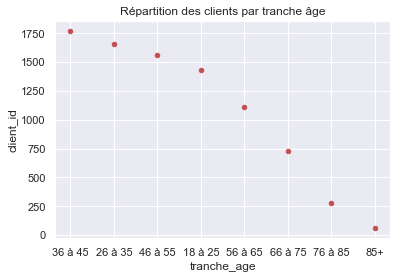

In [38]:
df.groupby([ 'tranche_age']).agg({'client_id' : 'nunique'}).sort_values(by = 'client_id', ascending = False ).reset_index().plot(kind = 'scatter', x = 'tranche_age', y='client_id', color ='r', title = 'Répartition des clients par tranche âge');

> La tranche d'age qui compte le plus de clients est la tranche ***36-45 ans.***

## Répartition des clients par âge

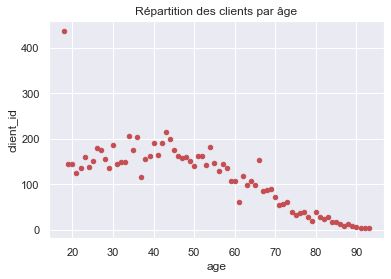

In [39]:
df.groupby([ 'age']).agg({'client_id' : 'nunique'}).sort_values(by = 'client_id', ascending = False ).reset_index().plot(kind = 'scatter', x = 'age', y='client_id', color ='r', title = 'Répartition des clients par âge');

> Les clients les plus nombreux de la librairie ont ***18 ans.***

> Le nombre de clients de 18 ans est anormalement élévé. 18 ans étant l'âge minimum pour se créer un compte et procéder à des achats, nous pouvons supposer que des personnes n'ayant pas l'âge minimum ont prétendu avoir 18 ans pour se créer un compte.  

## Répartition des clients par tranche d'âge et par genre

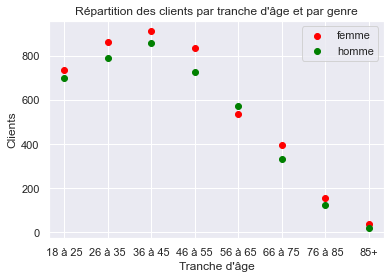

In [40]:
df_sex_f = df.groupby(['tranche_age']).apply(lambda x: x[x['sex'] == 'f' ]['client_id'].nunique()).reset_index()
df_sex_f.rename(columns={0 : 'f'}, inplace = True)
df_sex_m = df.groupby(['tranche_age']).apply(lambda x: x[x['sex'] == 'm' ]['client_id'].nunique()).reset_index()
df_sex_m.rename(columns={0 : 'm'}, inplace = True)

x=df_sex_f.tranche_age
y1=df_sex_f.f
y2=df_sex_m.m

plt.scatter(x,y1,c="red", label = 'femme')
plt.scatter(x,y2,c="green", label = 'homme')
plt.xlabel("Tranche d'âge")
plt.ylabel("Clients")
plt.legend()
plt.title("Répartition des clients par tranche d'âge et par genre")
plt.show()

> Les femmes sont plus nombreuses que les hommes dans toutes les tranches d'âges excepté la ***tranche 56-65 ans.***

## Répartition des clients par âge et par genre

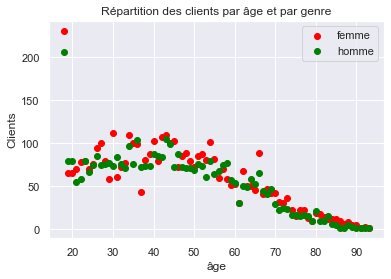

In [41]:
df_sex_f_2 = df.groupby(['age']).apply(lambda x: x[x['sex'] == 'f' ]['client_id'].nunique()).reset_index()
df_sex_f_2.rename(columns={0 : 'f'}, inplace = True)
df_sex_m_2 = df.groupby(['age']).apply(lambda x: x[x['sex'] == 'm' ]['client_id'].nunique()).reset_index()
df_sex_m_2.rename(columns={0 : 'm'}, inplace = True)

x=df_sex_f_2.age
y1=df_sex_f_2.f
y2=df_sex_m_2.m

plt.scatter(x,y1,c="red", label = 'femme')
plt.scatter(x,y2,c="green", label = 'homme')
plt.xlabel("âge")
plt.ylabel("Clients")
plt.legend()
plt.title("Répartition des clients par âge et par genre")
plt.show()

## Répartition du CA par tranche d'âge et par genre

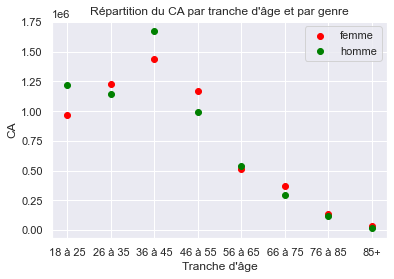

In [42]:
df_ca_age_sex = df.groupby(['tranche_age', 'sex']).agg({'session_id' : 'count', 'price' : 'sum'}).reset_index()
df_ca_age_sex_f = df_ca_age_sex[df_ca_age_sex['sex']=='f']
df_ca_age_sex_m = df_ca_age_sex[df_ca_age_sex['sex']=='m']

x=df_ca_age_sex_f.tranche_age
y1=df_ca_age_sex_f.price
y2=df_ca_age_sex_m.price

plt.scatter(x,y1,c="red", label = 'femme')
plt.scatter(x,y2,c="green", label = 'homme')
plt.xlabel("Tranche d'âge")
plt.ylabel("CA")
plt.legend()
plt.title("Répartition du CA par tranche d'âge et par genre")
plt.show()

> La tranche d'âge qui réalise le plus de CA est la ***tranche 36-45 ans*** et parmi les clients de cette tranche ce sont les hommes qui générent le plus de CA.

> Les hommes générent plus de CA que les femmes dans seulement deux tranches d'âge : 18-25 ans et 36-45ans.


> Dans les autres tranches d'âge ce sont les femmes qui réalisent le plus de CA. 

## Répartition du CA par âge et par genre

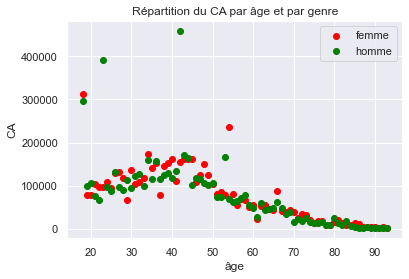

In [43]:
df_ca_age_sex_2 = df.groupby(['age', 'sex']).agg({'session_id' : 'count', 'price' : 'sum'}).reset_index()
df_ca_age_sex_f_2 = df_ca_age_sex_2[df_ca_age_sex_2['sex']=='f']
df_ca_age_sex_m_2 = df_ca_age_sex_2[df_ca_age_sex_2['sex']=='m']

x=df_ca_age_sex_f_2.age
y1=df_ca_age_sex_f_2.price
y2=df_ca_age_sex_m_2.price

plt.scatter(x,y1,c="red", label = 'femme')
plt.scatter(x,y2,c="green", label = 'homme')
plt.xlabel("âge")
plt.ylabel("CA")
plt.legend()
plt.title("Répartition du CA par âge et par genre")
plt.show()

> Nous pouvons constater qu'une part importante du CA est réalisée par 4 clients, 3 de genre masculin et un de genre féminin.

## Répartition du CA entre les clients via la courbe de LORENZ

- représentation graphique de la distribution d’une variable au sein d'une population
- permet de calculer le coefficient de Gini, qui mesure l'inégalité de cette variable dans une population donnée. 

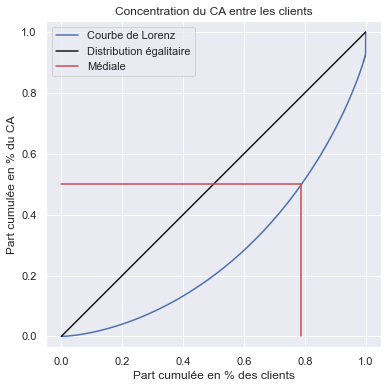

In [44]:
plt.figure(figsize=[6,6])

#plt.figure(figsize=(10,6))

ca_client_lorenz = df.groupby("client_id")["price"].sum()
dp_ca_client = ca_client_lorenz.values
n = len(dp_ca_client)
lorenz = np.cumsum(np.sort(dp_ca_client)) / dp_ca_client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post', label = 'Courbe de Lorenz')

## line plot of equality
plt.plot([0,1], [0,1], color='k', label = 'Distribution égalitaire')

medial = lorenz[(lorenz < 0.5)].size / lorenz.size
plt.plot([0,medial],[0.5,0.5],  color = 'r', label = 'Médiale')
plt.plot([medial,medial],[0,0.5], color = 'r')


#plt.plot(kind='line',[0,0.5], [0,0.5], label = 'médiale') 

plt.title('Concentration du CA entre les clients')
plt.ylabel('Part cumulée en % du CA')
plt.xlabel('Part cumulée en % des clients')
plt.legend(loc='upper left')
plt.show()

### Interprétation courbe de Lorenz via la règle de Pareto

> Règle de Pareto, ou règle du 80/20, signifie que 20% des clients representent 80% du CA. 
Règle qui permet de déterminer le profil des meilleurs acheteurs mais aussi de découvrir les 80% autres clients afin de les cibler et accroitre leur rendement. 

In [45]:
print('80% du CA est concentré par ', round(100 - np.interp(0.8, lorenz, np.linspace(0,1,n+1))*100), '% des clients.')

80% du CA est concentré par  4 % des clients.


> Ici, la règle de Pareto ne se vérifie pas car seulement 4% des clients rapportent 80% du CA.

### Indice de GINI

> L'indice (ou coefficient) de Gini est un indicateur synthétique permettant de rendre compte du niveau d'inégalité pour une variable et sur une population donnée. Il varie entre 0 (égalité parfaite) et 1 (inégalité extrême). Entre 0 et 1, l'inégalité est d'autant plus forte que l'indice de Gini est élevé.

In [46]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.4463952178607492

> La courbe de Lorenz (en bleu) est assez proche de la diagonale donc nous pouvons conclure que la concentration du CA est assez égalitaire.

---
Avant de procéder aux demandes de Julie et choisir parmi les différents tests statistiques, nous allons réaliser un test de normalité pour déterminer si la distribution est normale ou pas. 
***

# TEST DE NORMALITE KOLMOGOROV-SMIRNOV

    - Test si un échantillon de données a une distribution gaussienne.
    - Hypothèses : Les observations dans chaque échantillon sont indépendantes et distribuées de manière identique (iid).
    - Interprétation : 
        H0 : l’échantillon a une distribution gaussienne.
        H1 : l’échantillon n’a pas de distribution gaussienne.

In [112]:
data = df.price.unique()
stat, p = stats.kstest(data, 'norm')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement Gaussien')
else:
    print('Probablement non Gaussien')

stat=0.951, p=0.000
Probablement non Gaussien


In [113]:
data = df.age
stat, p = stats.kstest(data, 'norm')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement Gaussien')
else:
    print('Probablement non Gaussien')

stat=1.000, p=0.000
Probablement non Gaussien


> ***CONCLUSION*** : La distribution (prix unique, âge) n'est pas normale (ou non Gaussienne).

> Nous utiliserons UNIQUEMENT des ***TESTS NON PARAMETRIQUES.***

# DEMANDE DE JULIE N°1 - TEST D'INDEPENDANCE DU KHI2

> Le lien entre le genre d’un client et les catégories des livres achetés.
Est-ce que le sexe d'un client influe sur la catégorie qu'il achète ?

> Deux variables qualitatives


In [56]:
# tableau de contingence
df_heatmap

categ,0.0,1.0,2.0
sex,,,
f,206220,114899,17283
m,209460,112270,19200


In [53]:
# Nombres de ventes par catégorie et genre
df_heatmap = pd.crosstab(df['sex'], df['categ'])

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(df_heatmap)

alpha = 0.05
print("p value is " + str(st_p)) 
if st_p <= alpha: 
    print('les variables présentent une association statistiquement significative (rejeter H0)') 
else: 
    print('impossible de conclure que les variables sont associées (ne pas rejeter H0)') 

p value is 1.1989607410166063e-32
les variables présentent une association statistiquement significative (rejeter H0)


In [54]:
data = df_heatmap
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(df_heatmap)
print('stat=%.3f, p=%.3f' % (stat, p))
if st_p <= 0.05:
    print('les variables présentent une association statistiquement significative (rejeter H0)') 
else: 
    print('impossible de conclure que les variables sont associées (ne pas rejeter H0)') 

stat=346.064, p=0.000
les variables présentent une association statistiquement significative (rejeter H0)


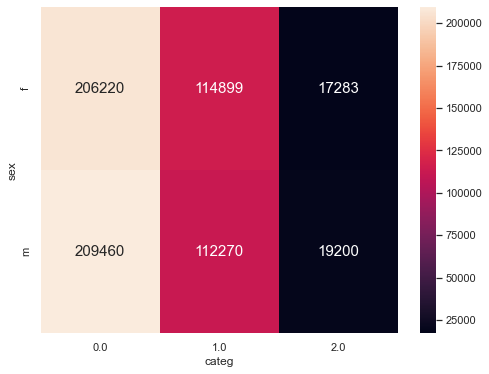

In [119]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_heatmap, annot=True, fmt='.0f', annot_kws={"size": 15});


> Le tableau de contingence nous montre une différence entre les ventes des hommes et des femmes. 
En effet, les hommes réalisent plus d'achats que les femmes dans deux catégories. 
Nous pourrions donc conclure à une différence de comportement entre les genres.

> Il est important de relever que les différences de comportement semblent minimes au vu des résultats de vente entre les genres. 

> Selon le test du KHI2, le genre d'un client et les catégories de livres achetés présentent une association statistiquement significative. 

> > Nous pouvons conclure qu'il y a un lien entre le genre et les catégories de livres.

# DEMANDE DE JULIE N°2 - TEST DE CORRELATION SPEARMAN

> Le lien entre l’âge des clients (variable continue) et le montant total des achats. 
Est-ce que l'âge influe sur le montant total des achats ?

> Deux variables quantitatives 


In [99]:
from scipy.stats import spearmanr 

data1 = df_ca_age_sex_2['age']
data2 = df_ca_age_sex_2['price'] 
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')

stat=-0.858, p=0.000
Probablement dépendant


> > si r = +/-0.75 alors force du lien linéaire est moyenne

> >  Ici on parle de ***corrélation négative*** : plus on avance en âge et plus le CA est bas.

> > Nous pouvons constater une variation simultanée en sens inverse. Les clients les plus âgés ont tendance à moins acheter que les plus jeunes. 

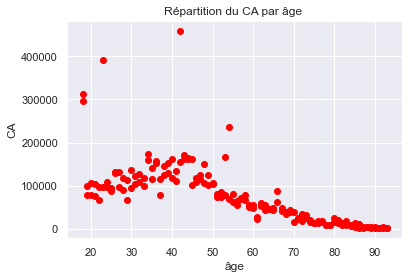

In [100]:
df_ca_age_sex_2 = df.groupby(['age', 'sex']).agg({'session_id' : 'count', 'price' : 'sum'}).reset_index()

x=df_ca_age_sex_2.age
y=df_ca_age_sex_2.price

plt.scatter(x,y,c="red",)
plt.xlabel("âge")
plt.ylabel("CA")
plt.title("Répartition du CA par âge ")
plt.show()

# DEMANDE DE JULIE N°3 - TEST DE CORRELATION SPEARMAN

> Lien entre l'âge des clients et la fréquence d'achat.
Est ce que l'âge a un impact sur la fréquence d'achat ? 

> Deux variables quantitatives

In [102]:
# frequence d'achat par age et par mois
df_frequence = df.groupby('age')[['session_id', 'client_id']].nunique().reset_index()
df_frequence['freq_mois'] = (df_frequence.session_id/df_frequence.client_id)/df.annee_mois.nunique()

# frequence d'achat par age et par trimestre 
df_frequence['freq_trimestre'] = (df_frequence.session_id/df_frequence.client_id)/12

# frequence d'achat par age et par semestre 
df_frequence['freq_semestre'] = (df_frequence.session_id/df_frequence.client_id)/6

# frequence d'achat par age et par annéé 
df_frequence['freq_annee'] = (df_frequence.session_id/df_frequence.client_id)/3

df_frequence.rename(columns = {'session_id' : 'nb_de_session', 'client_id' : 'nb_de client'}, inplace = True)

In [103]:
data1 = df_frequence['age'] 
data2 = df_frequence['freq_mois'] 
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')
print('*' *50)
print('La force de lien linéaire est nulle')
print('*' *50)
print('L\'âge n\'a pas d\'impact sur la fréquence d\'achat.')

stat=-0.062, p=0.594
Probablement indépendant
**************************************************
La force de lien linéaire est nulle
**************************************************
L'âge n'a pas d'impact sur la fréquence d'achat.


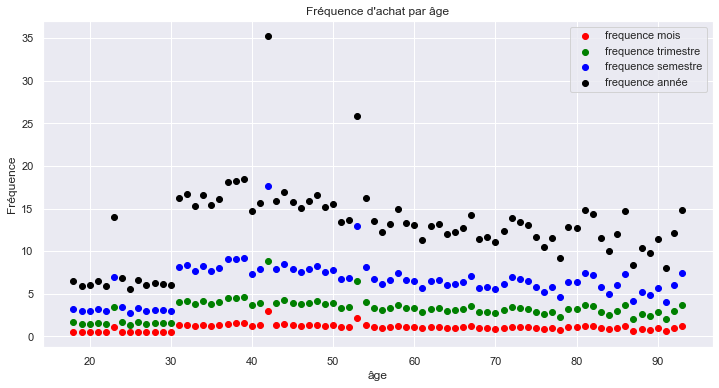

In [104]:
plt.figure(figsize=[12,6])


x=df_frequence.age
y1=df_frequence.freq_mois
y2 = df_frequence.freq_trimestre
y3 = df_frequence.freq_semestre
y4 = df_frequence.freq_annee
plt.scatter(x,y1,c="red", label = 'frequence mois')
plt.scatter(x,y2,c="green", label = 'frequence trimestre')
plt.scatter(x,y3,c="blue", label = 'frequence semestre')
plt.scatter(x,y4,c="black", label = 'frequence année')


plt.xlabel("âge")
plt.ylabel("Fréquence")
plt.legend()
plt.title("Fréquence d'achat par âge")
plt.show()

# DEMANDE DE JULIE N°4 - TEST DE CORRELATION SPEARMAN

> Le lien entre l'âge et le panier moyen.Est-ce que l'âge a un impact sur le montant du panie rmoyen ? 

> Deux variables quantitatives.

In [105]:
df_panier_moyen_2 = df.groupby(['age']).agg({'session_id' : 'count', 'price' : 'sum'}).reset_index()
df_panier_moyen_2['panier_moyen'] = df_panier_moyen_2.price/df_panier_moyen_2.session_id
df_panier_moyen_2.drop('price', inplace = True, axis = 1)
df_panier_moyen_2.drop('session_id', inplace = True, axis = 1)

data1 = df_panier_moyen_2['age'] 
data2 = df_panier_moyen_2['panier_moyen']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')
print('*' *50)
print('La force de lien linéaire est nulle.')
print('*' *50)
print('L\'âge n\'a pas d\'impact sur le panier moyen.')


stat=-0.086, p=0.461
Probablement indépendant
**************************************************
La force de lien linéaire est nulle.
**************************************************
L'âge n'a pas d'impact sur le panier moyen.


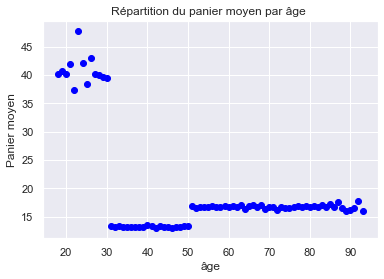

In [106]:
x=df_panier_moyen_2.age
y=df_panier_moyen_2.panier_moyen

plt.scatter(x,y,c="blue",)
plt.xlabel("âge")
plt.ylabel("Panier moyen")
plt.title("Répartition du panier moyen par âge ")
plt.show()

# DEMANDE DE JULIE N°4 - KRUSKAL WALLIS

> Lien entre l'âge et la catégorie des livres achetés

> Une variable quantitative et une variable qualitative

In [51]:
df_age_cat_2 = df.groupby(['age', 'categ', ]).agg({ 'session_id' : 'count'}).reset_index()


from scipy import stats
data1 = df_age_cat_2['age'] 
data2 = df_age_cat_2['categ']
stat, p = stats.kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')
print('*' *50)
print('L\'âge a un impact sur le choix de la catégorie du produit.')


stat=346.064, p=0.000
Probablement dépendant
**************************************************
L'âge a un impact sur le choix de la catégorie du produit.
